In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline
from cnn_utils import *

In [2]:
new_data = pd.read_csv('./data/test.csv')
# new_data[new_data > 0] = 1
new_data = new_data / 20
new_data = shape_image(new_data).astype("float")

In [3]:
X, Y = create_placeholders(28, 28, 1, 10)
W1, W2, W3 = initialize_parameters()
# W1 = tf.Variable(tf.random_normal([4,4,1,8]))
# W2 = tf.Variable(tf.random_normal([4,4,8,16]))
Z3 = tf.argmax(forward_propagation(X, W1, W2, W3), 1)
sess2 = tf.Session()
saver = tf.train.Saver()
saver.restore(sess2, CKPT_PATH)

INFO:tensorflow:Restoring parameters from ./cnn/cnn.ckpt


In [4]:
pred = sess2.run(Z3, feed_dict={X: new_data})

(array([ 2732.,  3220.,  2839.,  2792.,  2678.,  2508.,  2823.,  2851.,
         2757.,  2800.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

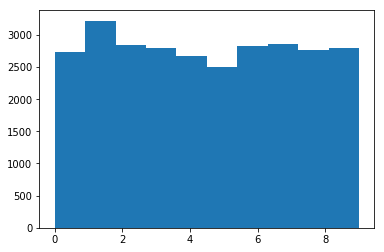

In [5]:
plt.hist(pred)

In [6]:
df = pd.DataFrame(pred)

In [7]:
df.index += 1
df.index.name = 'ImageId'
df.columns = ['Label']
df.to_csv("res2.csv")